In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from matplotlib import rc,rcParams
from pylab import *

In [2]:
import arviz as az 
# Set the style of the plots to a more beautiful format
az.style.use('arviz-whitegrid')

## Define Logistic Map

In [3]:
def logistic(r, x):
    return r * x * (1 - x)

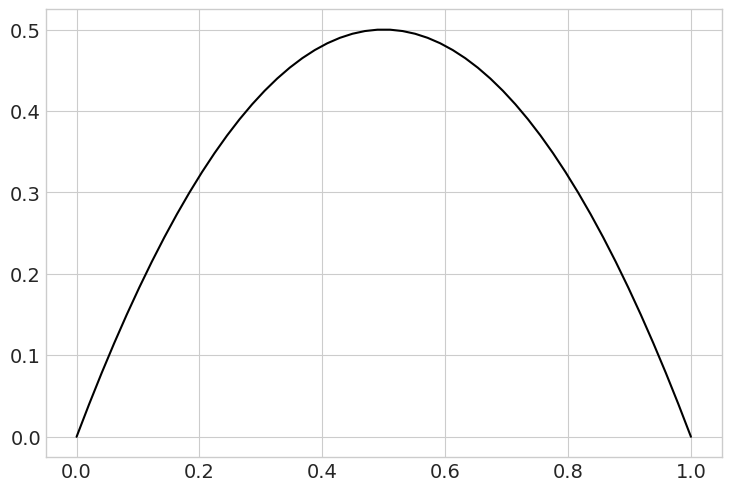

In [4]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k')

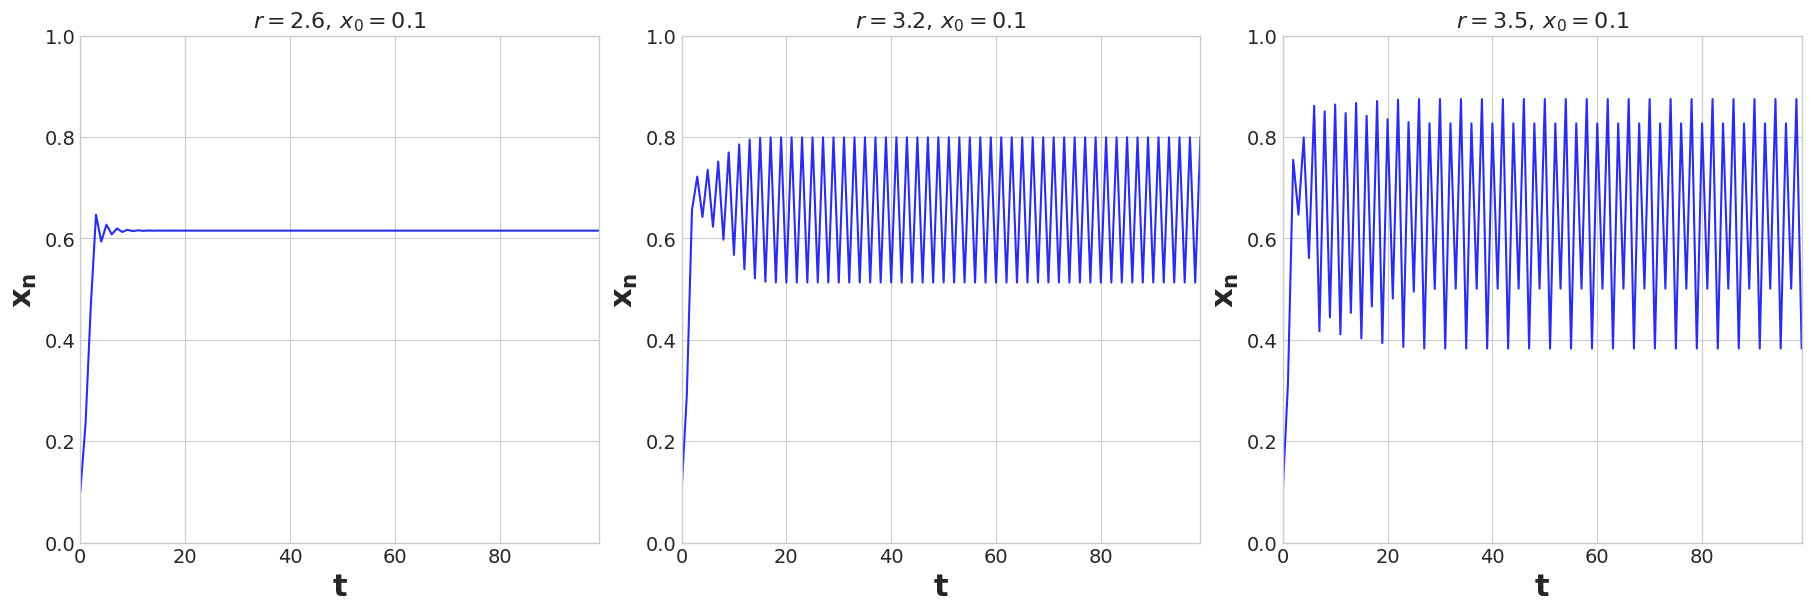

In [5]:
def plot_system2(r, x0, n, nskip=0, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    #t = np.linspace(0, 1)
    x_T=[]
    T=[]
    t=0
    x = x0
    for i in range(n + nskip):
        if i >= nskip:
            x_T.append(x)
            T.append(t)
            t+=1
        x = logistic(r,x)

    ax.plot(T,x_T)
    ax.set_xlim(0, T[-1])
    ax.set_ylim(0, 1)
    ax.set_title( f"$r={r:.1f}, \, x_0={x0:.1f} $")

    ax.set_xlabel('t', fontsize=22, fontweight='bold')
    ax.set_ylabel(r'$\mathbf{x_n}$', fontsize=22, fontweight='bold')


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plot_system2(2.6, .1, 100, ax=ax1)
plot_system2(3.2, .1, 100, ax=ax2)
plot_system2(3.5, .1, 100, ax=ax3)

# Individual Plots

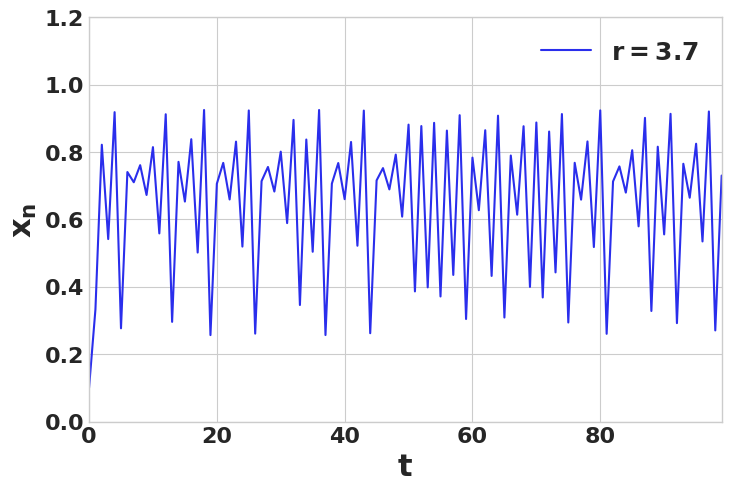

In [17]:
# activate latex text rendering
for r in [2.6,3.2,3.5,3.7]:

    x0 = 0.1
    n = 100
    nskip=0
    # Plot the function and the
    # y=x diagonal line.
    #t = np.linspace(0, 1)
    x_T=[]
    T=[]
    t=0
    x = x0
    for i in range(n + nskip):
        if i >= nskip:
            x_T.append(x)
            T.append(t)
            t+=1
        x = logistic(r,x)



    plt.plot(T,x_T,label=r"$\mathbf{r=3.7}$")



    plt.xlim(0, T[-1])
    plt.ylim(0, 1.2)

    plt.xlabel('t', fontsize=22, fontweight='bold')
    plt.ylabel(r'$\mathbf{x_n}$', fontsize=22, fontweight='bold')

    plt.xticks(fontsize=16,fontweight='bold')
    plt.yticks(fontsize=16,fontweight='bold')

    plt.legend(fontsize=18)

    plt.savefig(f'logistic_r{r}.png')

## Bifurcation Diagram

In [18]:
# n values spaced equaly on 2.5 : 4 
n = 10000
r = np.linspace(2.5, 4.0, n)

# Transitory iterations and actual iterations
iterations = 1000
last = 100

In [19]:
# Initial cond
x = 1e-5 * np.ones(n)

# lyapunov initialization
lyapunov = np.zeros(n)

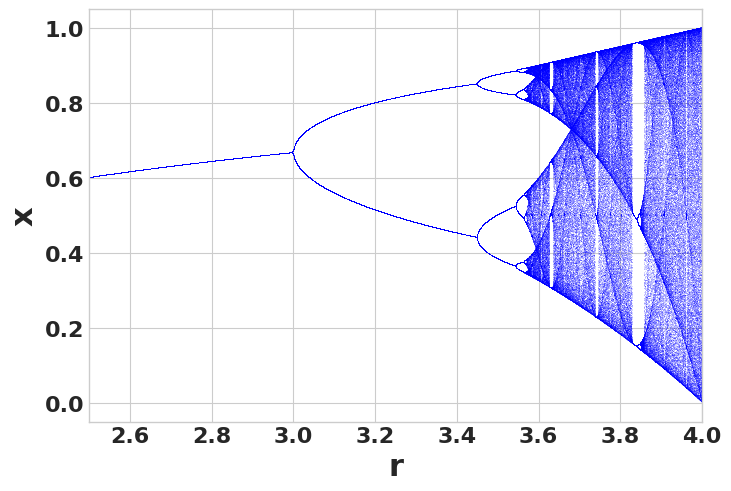

In [20]:
plt.figure()
for i in range(iterations):
    x = logistic(r, x)
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        plt.plot(r, x, ',b', alpha=.15)
plt.xlim(2.5, 4)
plt.xlabel('r', fontsize=22, fontweight='bold')
plt.ylabel('x', fontsize=22, fontweight='bold')

plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

#plt.title("Bifurcation diagram")
plt.savefig('logisticbifurcation.png')



## Logistic Bifurcation with Lyapunov Exponents

Text(0.5, 1.0, 'Lyapunov exponent')

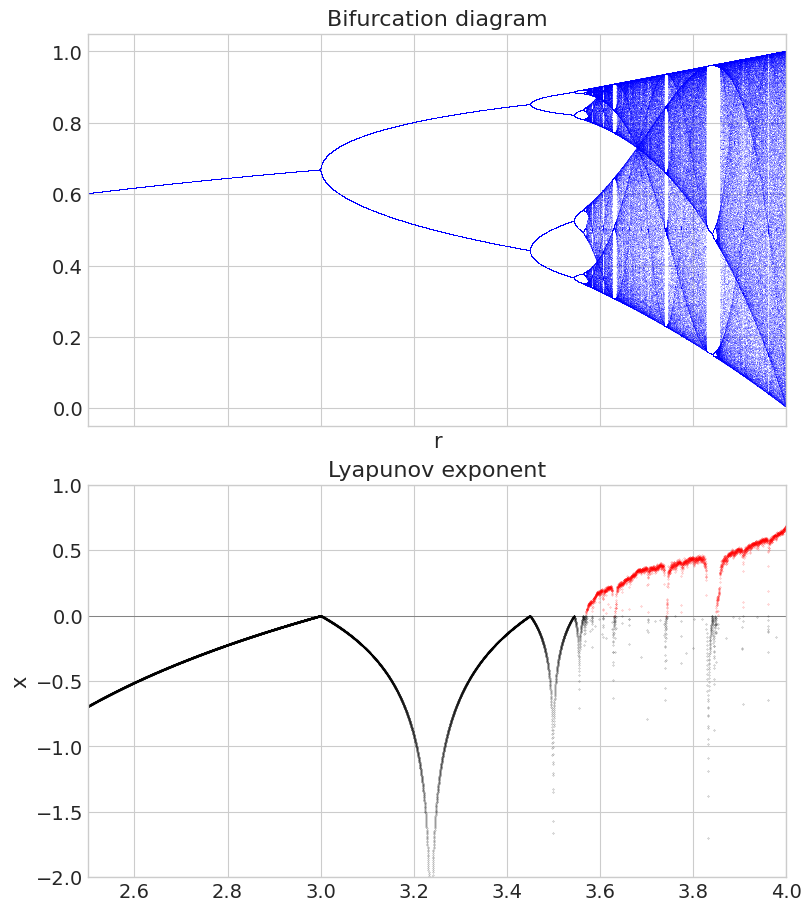

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',b', alpha=.15)
ax1.set_xlim(2.5, 4)
ax1.set_xlabel('r')
ax2.set_ylabel('x')
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")

#plt.savefig('logisticbifurcation_lyapunov.png')
